In [1]:

import random


class GeneticAlgorithm:

    def __init__(
        self,
        objs,
        population_size=50,
        mutation_percentage=0.05,
        num_generations=200,
        crossings_percentage=0.8,
    ):
        self.objs = objs
        self.POPULATION_SIZE = population_size
        self.MUTATION_PERCENTAGE = mutation_percentage
        self.NUM_GENERATIONS = num_generations
        self.NUM_CROSSINGS = int(population_size * crossings_percentage) // 2


    def fn(self, instance):
        val = 0
        weight = 0
        for i in range(len(instance)):
            val += instance[i] * self.objs[i][0]
            weight += instance[i] * self.objs[i][1]
        return val if weight <= 15 else 0

    def build_roullete(self):
        roullete = []
        acc_score = 0
        for i in range(self.POPULATION_SIZE):
            roullete.append(acc_score)
            acc_score += self.fn(self.individues[i])
        return roullete, acc_score

    def select(self, roullete, acc_score):
        point = random.randint(0, acc_score)
        # bin search to find closest element to point in roullete
        # return idx of roullete
        l, r = 0, len(roullete) - 1
        mx = 0
        while l <= r:
            m = (l + r) // 2

            if roullete[m] > point:
                r = m - 1
            else:
                mx = max(mx, m)
                l = m + 1
        return mx

    def eval_best(self, instance):
        if self.fn(instance) > self.fn(self.best):
            self.best = instance

    def cross(self, indv1, indv2):
        child1 = [0 for _ in range(len(self.objs))]
        child2 = [0 for _ in range(len(self.objs))]
        while self.fn(child1) == 0 or self.fn(child2) == 0:
            child1 = self.individues[indv1].copy()
            child2 = self.individues[indv2].copy()

            gene1 = random.randint(0, len(self.objs) - 1)
            gene2 = random.randint(0, len(self.objs) - 1)

            if gene1 != gene2:
                child1[gene1], child2[gene1] = child2[gene1], child1[gene1]
            child1[gene2], child2[gene2] = child2[gene2], child1[gene2]

        self.individues[indv1] = child1
        self.individues[indv2] = child2
        self.eval_best(self.individues[indv1])
        self.eval_best(self.individues[indv2])

    def mutate(self, indv1, indv2):
        if random.random() > self.MUTATION_PERCENTAGE:
            return

        indv = indv1 if random.random() > 0.5 else indv2
        mutated = [0 for _ in range(len(self.objs))]

        while self.fn(mutated) == 0:
            mutated = self.individues[indv].copy()
            gene = random.randint(0, len(self.objs) - 1)
            mutated[gene] = random.randint(0, 1)

        self.individues[indv] = mutated
        self.eval_best(self.individues[indv])

    def run(self):

        # setup initial population
        self.individues = []
        self.best = None
        while len(self.individues) < self.POPULATION_SIZE:
            instance = []
            for _ in range(len(self.objs)):
                instance.append(1 if random.random() > 0.5 else 0)

            score = self.fn(instance)
            if score > 0:
                self.individues.append(instance)
                if not self.best or score > self.fn(self.best):
                    self.best = instance.copy()


        best_history = []

        # genetic
        t = 0
        while t < 200:
            roullete, acc_score = self.build_roullete()
            for _ in range(self.NUM_CROSSINGS):
                indv1 = self.select(roullete, acc_score)
                indv2 = self.select(roullete, acc_score)
                self.cross(indv1, indv2)
                self.mutate(indv1, indv2)
            best_history.append(self.fn(self.best))
            t += 1
        return self.best, best_history


In [2]:
items = [
    [40, 2],  # A
    [50, 3],  # B
    [65, 4],  # C
    [80, 5],  # D
    [110, 7],  # E
    [15, 1],  # F
    [90, 6],  # G
    [70, 4.5],  # H
    [60, 3.5],  # I
    [55, 2.5],  # J
]


algo = GeneticAlgorithm(items)
best_instance, best_history = algo.run()

print(f"best: {best_instance}, instance_score: {algo.fn(best_instance)}" )

best: [1, 1, 1, 0, 0, 0, 0, 0, 1, 1], instance_score: 270


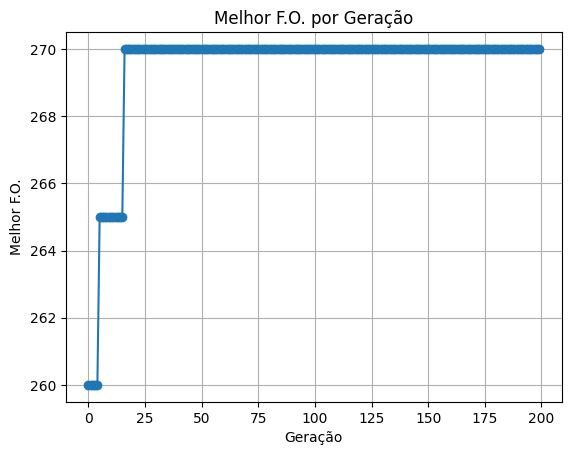

In [3]:
import matplotlib.pyplot as plt


# Plot
plt.plot(range(len(best_history)), best_history, marker='o')
plt.xlabel('Geração')
plt.ylabel('Melhor F.O.')
plt.title('Melhor F.O. por Geração')
plt.grid(True)
plt.show()
